# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import sys
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
oPath = "output_data"
if not os.path.exists(oPath):
    os.makedirs(oPath)
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Create base uri
uri = "http://api.openweathermap.org/data/2.5/weather?q="
wapi = f"&appid={weather_api_key}"

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_df = pd.DataFrame(columns=['City',	'Lat',	'Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date'])
rCount = 0
print("Beginning Data Retrieval\r\n-----------------------------")
for c in cities:
    
    rslt = requests.get(f"{uri}{c}&units=imperial{wapi}").json()
    try:
        rCount += 1
        city_df.loc[len(city_df.index)] = [rslt['name'],rslt["coord"]["lat"],rslt["coord"]["lon"],rslt["main"]["temp_max"],rslt["main"]["humidity"],rslt["clouds"]["all"],rslt["wind"]["speed"],rslt["sys"]["country"],rslt["dt"]]
        print(f"Processing Record {rCount} of Set 1 | {rslt['name']}")
    except:
        print(f"City: {c} not found. Skipping...")
        pass

of Set 1 | Pisco
Processing Record 129 of Set 1 | Novo Aripuanã
Processing Record 130 of Set 1 | Kaitangata
Processing Record 131 of Set 1 | Chokurdakh
Processing Record 132 of Set 1 | Chernyshevskiy
Processing Record 133 of Set 1 | Gwadar
Processing Record 134 of Set 1 | García
Processing Record 135 of Set 1 | Margate
Processing Record 136 of Set 1 | Sur
Processing Record 137 of Set 1 | Ayagoz
Processing Record 138 of Set 1 | Jaciara
City: taolanaro not found. Skipping...
Processing Record 140 of Set 1 | Udachny
Processing Record 141 of Set 1 | Port Moresby
Processing Record 142 of Set 1 | Marmaris
Processing Record 143 of Set 1 | Ürümqi
City: umzimvubu not found. Skipping...
Processing Record 145 of Set 1 | Sørland
Processing Record 146 of Set 1 | Cape Town
Processing Record 147 of Set 1 | Marawi
Processing Record 148 of Set 1 | Montepuez
Processing Record 149 of Set 1 | Saint-Pierre
Processing Record 150 of Set 1 | Aberfeldy
Processing Record 151 of Set 1 | Basco
Processing Record 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_df.to_csv(output_data_file,index=False)
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,-9.4,84,75,10.36,CA,1616109435
1,Andrews,32.3187,-102.5457,62.6,17,1,5.03,US,1616109436
2,Requena,39.4883,-1.1004,46.0,91,49,3.87,ES,1616109436
3,Puerto Colombia,10.9878,-74.9547,78.8,78,75,12.66,CO,1616109436
4,Ushuaia,-54.8000,-68.3000,46.4,71,40,11.50,AR,1616109423


In [5]:
city_df[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']].agg(['count','sum','mean','median','std','sem',])

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000
sum,11310.418500,9369.510300,30212.590000,40382.000000,30453.000000,4167.430000
mean,20.452836,16.943057,54.633978,73.023508,55.068716,7.536040
median,22.890900,19.776000,63.000000,78.000000,72.000000,5.950000
std,32.497695,90.983671,26.935941,21.808982,38.468493,5.289449
sem,1.381943,3.869019,1.145433,0.927412,1.635847,0.224930


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.
index_names = city_df[ city_df['Humidity'] > 100 ].index

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_df = city_df.drop(index_names, inplace = False)

Text(0.5, 1.0, 'Latitude vs. Max Temperature')

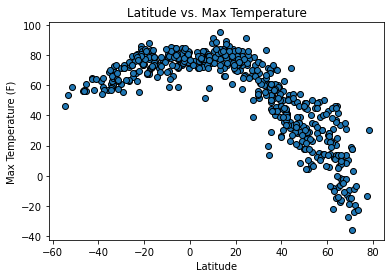

In [8]:
plt.scatter(x=clean_city_df['Lat'],y=clean_city_df['Max Temp'],edgecolors='black')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('Latitude vs. Max Temperature')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0.5, 1.0, 'Latitude vs. Max Temperature')

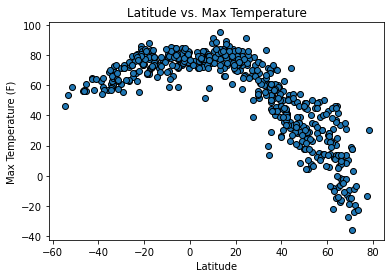

In [9]:
plt.scatter(x=clean_city_df['Lat'],y=clean_city_df['Max Temp'],edgecolors='black')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('Latitude vs. Max Temperature')

## Latitude vs. Humidity Plot

Text(0.5, 1.0, 'Latitude vs. Humidity')

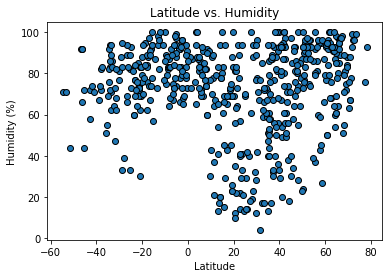

In [10]:
plt.scatter(x=clean_city_df['Lat'],y=clean_city_df['Humidity'],edgecolors='black')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs. Humidity')

## Latitude vs. Cloudiness Plot

Text(0.5, 1.0, 'Latitude vs. Cloudiness')

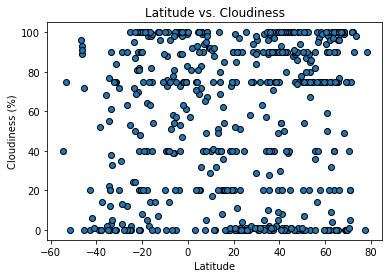

In [11]:
plt.scatter(x=clean_city_df['Lat'],y=clean_city_df['Cloudiness'],edgecolors='black')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('Latitude vs. Cloudiness')

## Latitude vs. Wind Speed Plot

Text(0.5, 1.0, 'Latitude vs. Wind Speed')

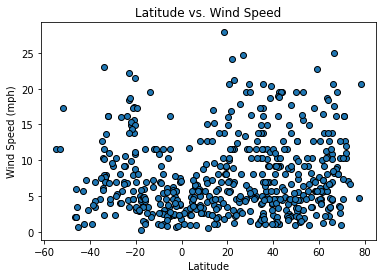

In [12]:
plt.scatter(x=clean_city_df['Lat'],y=clean_city_df['Wind Speed'],edgecolors='black')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('Latitude vs. Wind Speed')

## Linear Regression

In [13]:

NH_DF = clean_city_df.loc[clean_city_df['Lat'] >= 0]
SH_DF = clean_city_df.loc[clean_city_df['Lat'] < 0]
NH_DF.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,-9.40,84,75,10.36,CA,1616109435
1,Andrews,32.3187,-102.5457,62.60,17,1,5.03,US,1616109436
2,Requena,39.4883,-1.1004,46.00,91,49,3.87,ES,1616109436
3,Puerto Colombia,10.9878,-74.9547,78.80,78,75,12.66,CO,1616109436
7,Alquízar,22.8058,-82.5842,82.40,57,20,6.91,CU,1616109437
9,The Valley,18.2170,-63.0578,78.01,69,40,10.36,AI,1616109438
10,Coahuayana Viejo,18.7333,-103.6833,84.20,45,20,13.80,MX,1616109438
11,Yellowknife,62.4560,-114.3525,30.99,68,75,9.22,CA,1616109186
13,Katsuura,35.1333,140.3000,57.99,51,96,1.99,JP,1616109439
14,Zyryanka,65.7500,150.8500,-17.10,93,100,10.87,RU,1616109439


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8810332321314005


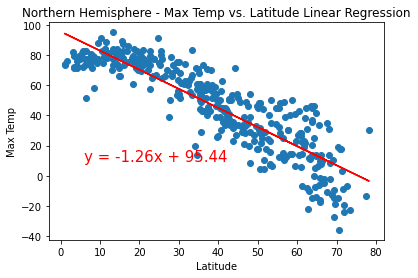

In [23]:
x_values = NH_DF['Lat']
y_values = NH_DF['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6984279592248915


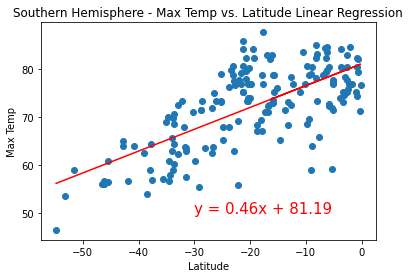

In [25]:
x_values = SH_DF['Lat']
y_values = SH_DF['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [16]:

x_values = clean_city_df['Lat']
y_values = clean_city_df['Humidity']
try:
    linregress(x_values.astype(float), y_values.astype(float))
except AttributeError as ae:
    print(ae)
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

The r-value is: 0.2598752388186116


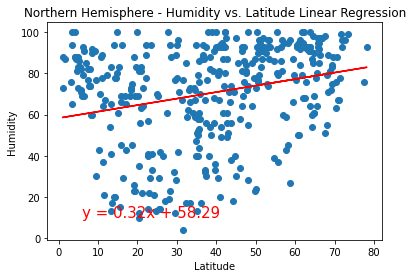

In [17]:
x_values = NH_DF['Lat']
y_values = NH_DF['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3184441865652718


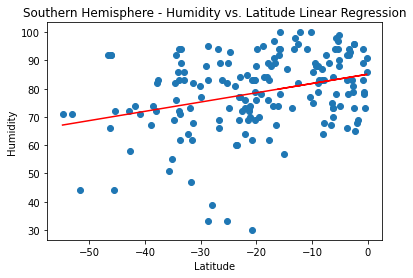

In [18]:
x_values = SH_DF['Lat']
y_values = SH_DF['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1192079714115162


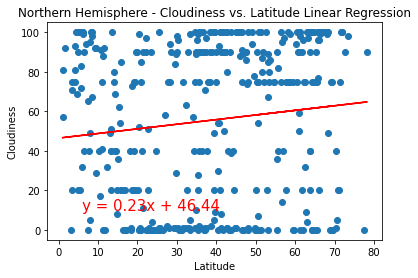

In [19]:
x_values = NH_DF['Lat']
y_values = NH_DF['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.34310393257539956


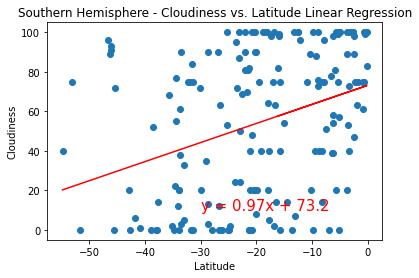

In [20]:
x_values = SH_DF['Lat']
y_values = SH_DF['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.13565912669735697


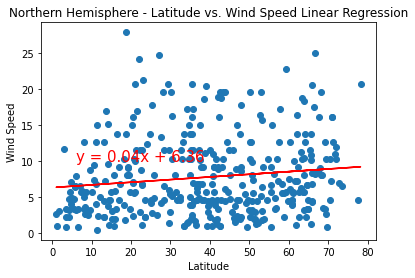

In [21]:
x_values = NH_DF['Lat']
y_values = NH_DF['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.title('Northern Hemisphere - Latitude vs. Wind Speed Linear Regression')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.21744736337181414


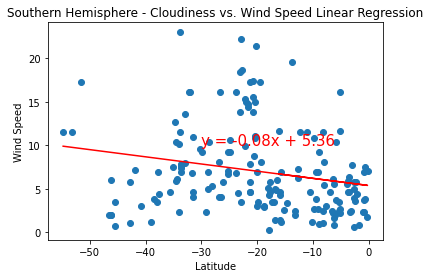

In [22]:
x_values = SH_DF['Lat']
y_values = SH_DF['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values.astype(float), y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue}")
plt.title('Southern Hemisphere - Cloudiness vs. Wind Speed Linear Regression')
plt.show()